In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [38]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 11

In [72]:
# Read the data file
df = pd.read_pickle('10_first_ppl_100_rots.pkl')

In [78]:
categ = "Gender" # The category for classification

if categ == "Finger":
    it = 5
else:
    it = 2

In [79]:
# --------------------------------------
# SECOND STAGE MODEL TRAINING
# --------------------------------------

model2 = []   # For storing trained models
X_train2 = [0]*it   # For storing training images, sorted by finger
X_test2 = [0]*it   # For storing testing images, sorted by finger
y_train2 = [0]*it   # For storing training identities, sorted by finger
y_test2 = [0]*it   # For storing testing identities, sorted by finger

for i in range(0,it):
    X = list(df[df[categ]==i]["Image"])
    y = df[df[categ]==i]["Identity"]
    X_train2[i], X_test2[i], y_train2[i], y_test2[i] = train_test_split(X,y,test_size=0.2)
    model2.append(RandomForestClassifier())
    model2[i].fit(X_train2[i],y_train2[i])
    
# --------------------------------------
# END OF SECOND STAGE MODEL TRAINING
# --------------------------------------

In [80]:
# -------------------------------------
# FIRST STAGE MODEL TRAINING
# -------------------------------------
X_train = []
X_test = []
for i in range(len(X_train2)):
    X_train += X_train2[i]
for i in range(len(X_test2)):
    X_test += X_test2[i]
y_train_id = pd.concat(y_train2)
y_test_id = pd.concat(y_test2)
y_train = [] # Category
y_test = [] # Category

for i in range(len(y_train_id)):
    j = y_train_id.index[i]
    y_train.append([df[categ][j],j])
for i in range(len(y_test_id)):
    j = y_test_id.index[i]
    y_test.append([df[categ][j],j])
    
y_train_indexfree = [i[0] for i in y_train]

model_finger = RandomForestClassifier()
model_finger.fit(X_train,y_train_indexfree) # Fit the model fo training data
# -------------------------------------
# END OF FIRST STAGE MODEL TRAINING
# -------------------------------------

RandomForestClassifier()

In [81]:
# --------------------------------------
# MODEL IMPLEMENTATION
# --------------------------------------
pred_finger = model_finger.predict(X_test)

X_pred = [[] for _ in range(it)]  # Images sorted by predicted finger
y_true = [[] for _ in range(it)]  # True identities sorted by predicted finger


for i in range(len(pred_finger)):
    finger = pred_finger[i]
    X_pred[finger].append(X_test[i])
    index = y_test[i][1]
    y_true[finger].append(df["Identity"][index])

pred_id = [[] for _ in range(it)]

for i in range(it):
    if X_pred[i]:
        pred_id[i] = model2[i].predict(X_pred[i])
# --------------------------------------
# END OF MODEL IMPLEMENTATION
# --------------------------------------

In [82]:
# --------------------------------------
# EVALUATION OF RESULTS
# --------------------------------------
# Calculate accuracy
succs = 0  # Number of successful predictions
for i in range(len(pred_id)):
    for j in range(len(pred_id[i])):
        if pred_id[i][j] == y_true[i][j]:
            succs+=1
print("Accuracy: " + str(succs/len(X_test)))
print("Successful predictions: " + str(succs))
# --------------------------------------
# END OF EVALUATION OF RESULTS
# --------------------------------------

Accuracy: 0.343
Successful predictions: 686


#### 10_first_ppl_100_rots, finger
[0.2825, 0.2645, 0.273, 0.276, 0.27]

#### hand
[0.318,0.3135,0.3215,0.313,0.307]

#### gender
[0.331, 0.337, 0.326, 0.3405, 0.348]

In [83]:
pred_id = np.concatenate(pred_id)
y_true = np.concatenate(y_true)

Text(33.0, 0.5, 'Truth')

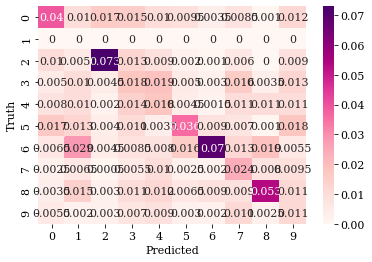

In [85]:
# Confusion matrix
cm = confusion_matrix(pred_id, y_true, normalize='all') # Remove 'normalize="all"' to get absolute numbers
plt.figure()
sn.heatmap(cm, annot=True, cmap='RdPu')
# plt.title('Confusion matrix for 2-stage prediction of identity')
plt.xlabel('Predicted')
plt.ylabel('Truth')